In [1]:
import findspark
findspark.init()

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
        .master('yarn') \
        .appName('yuchanyuchan') \
        .getOrCreate()


In [3]:
sc = spark.sparkContext

In [4]:
sc

<SparkContext master=yarn appName=yuchanyuchan>

In [5]:
wordcounts = sc.textFile('s3://ssds2/gutenberg.txt')


In [6]:
wordcounts.map(lambda x : x.replace(',','').replace('.','').replace('\""','').replace('\'','').lower()) \
           .flatMap(lambda x : x.split()) \
            .map(lambda x : (x,1)) \
            .reduceByKey(lambda x,y : x+y) \
            .map(lambda x : (x[1],x[0])) \
            .sortByKey(False) \
            .toDF() \
            .show()


+----+----+
|  _1|  _2|
+----+----+
|2833| the|
|1474|  to|
|1454|  of|
|1449| and|
|1060|   i|
| 982|   a|
| 810|  in|
| 770|that|
| 604|  he|
| 579| was|
| 569| his|
| 542| for|
| 501|  it|
| 489| had|
| 480| you|
| 448|  as|
| 400|have|
| 397|with|
| 348|  is|
| 319|  at|
+----+----+
only showing top 20 rows



In [7]:
p1 = wordcounts.map(lambda x:x.replace(',','').replace('.','').replace('\'','').replace('\""','').lower())

In [8]:
p2 = p1.flatMap(lambda x : x.split())
p3 = p2.map(lambda x: (x,1))
p4 = p3.reduceByKey(lambda x,y : x+y)
p5 = p4.map(lambda x:(x[1],x[0]))
p6 = p5.sortByKey(False)
d = p6.toDF()
d.show()

+----+----+
|  _1|  _2|
+----+----+
|2833| the|
|1474|  to|
|1454|  of|
|1449| and|
|1060|   i|
| 982|   a|
| 810|  in|
| 770|that|
| 604|  he|
| 579| was|
| 569| his|
| 542| for|
| 501|  it|
| 489| had|
| 480| you|
| 448|  as|
| 400|have|
| 397|with|
| 348|  is|
| 319|  at|
+----+----+
only showing top 20 rows



In [9]:
import random
ns = 1000000
def inside(p):
    x,y = random.random(),random.random()
    return x*x + y*y <1

count = sc.parallelize(list(range(0,ns))).filter(inside).count()
print(4.0*count/ns)

3.140536


In [10]:
g = sc.textFile('s3://ssds2/gutenberg.txt')
list(map(print,g.take(10)))

The Project Gutenberg EBook of Friday, the Thirteenth, by Thomas W. Lawson

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net


Title: Friday, the Thirteenth



[None, None, None, None, None, None, None, None, None, None]

In [11]:
p = spark.read.option('header','true').option('nullValue','?').option('inferSchema','true').csv

In [12]:
df = spark.read.json('s3://ssds2/people.json')
df.select('name').show()
df.where('age>21').show()

+-------+
|   name|
+-------+
|Michael|
|   Andy|
| Justin|
+-------+

+---+----+
|age|name|
+---+----+
| 30|Andy|
+---+----+



In [13]:
from pyspark.sql.functions import col
from pyspark.sql.types import Row


g = sc.textFile('s3://ssds2/gutenberg.txt')
cg = g.map(lambda x : Row(x)).toDF(['contents'])
print('total rows :', cg.count())
bob = cg.filter(col('contents').like('%Bob%'))
print('number of lines containing word \'Bob\'', bob.count())
bob.collect()



total rows : 4881
number of lines containing word 'Bob' 364


[Row(contents='"Friday, the 13th; I thought as much. If Bob has started, there will be'),
 Row(contents="second. It's Bob--that is evident to all. If he keeps up this pace for"),
 Row(contents='"Are you sure, Fred, that this is Bob\'s work?" I asked. "Have you seen'),
 Row(contents="executing Bob's orders, and have been pouring Anti-People's out for an"),
 Row(contents='values every few minutes, I was sure this was the work of Bob Brownley.'),
 Row(contents='minutes. The night before I had passed Bob in the theatre lobby. I gave'),
 Row(contents="flash and snarl, I remembered Bob's ugly mood, and all it portended."),
 Row(contents="Fred Brownley was Bob's youngest brother, twelve years his junior. He had"),
 Row(contents='year had been our most trusted Stock Exchange man. Bob Brownley, when'),
 Row(contents='of Bob--and his option during the past five years had been exercised many'),
 Row(contents='the world, for then Bob knew no kindred, no friends. All the wide world'),
 Row(contents

In [14]:
import matplotlib.pyplot as plt
import matplotlib as mlt
import seaborn as sns

sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

In [15]:
dl = spark.read.option('header','true').option('nullValue','?').option('inferSchema','true')\
    .csv('s3://ssds2/bikeshare_loc.csv')
du = spark.read.option('header','true').option('nullValue','?').option('inferSchema','true')\
    .csv('s3://ssds2/bikeshare_seoul.csv')
dl.show()
du.show()

+------+--------+----------+----------------------------------+----------------------------------+--------+---------+----------+
|  구명|대여소ID|대여소번호|                          대여소명|                       대여소 주소|거치대수|     위도|      경도|
+------+--------+----------+----------------------------------+----------------------------------+--------+---------+----------+
|강남구|  ST-777|      2301|               현대고등학교 건너편|  서울특별시 강남구 압구정로 13...|      10|37.524071| 127.02179|
|강남구|  ST-787|      2302| 교보타워 버스정류장(신논현역 3...|서울특별시 강남구 봉은사로 지하...|      10|37.505581|127.024277|
|강남구|  ST-788|      2303|                    논현역 7번출구| 서울특별시 강남구 학동로 지하 ...|      15|37.511517|127.021477|
|강남구|  ST-789|      2304|              신영 ROYAL PALACE 앞|   서울특별시 강남구 언주로 626...|      10|37.512527|127.035835|
|강남구|  ST-790|      2305|                MCM 본사 직영점 앞|   서울특별시 강남구 언주로 734...|      10|37.520641|127.034508|
|강남구|  ST-791|      2306|              압구정역 2번 출구 옆|서울특별시 강남구 압구정로 지하...|      30|37.527122|127.028717|
|강남구

In [16]:
import pyspark.sql.functions as sf
dl.filter(dl['대여소번호']==2319).show()
dl.groupBy('구명').sum('거치대수').show()
dl.groupBy('구명').agg(sf.sum('거치대수').alias('sumofgu')).show()
dl.groupBy('구명','대여소번호').agg(sf.sum('거치대수').alias('temp')).show()
dl.groupBy('구명').count().orderBy('count',ascending=False).show()
##dl.where('대여소번호==2319').show()

+------+--------+----------+----------------------------------+--------------------------------+--------+---------+---------+
|  구명|대여소ID|대여소번호|                          대여소명|                     대여소 주소|거치대수|     위도|     경도|
+------+--------+----------+----------------------------------+--------------------------------+--------+---------+---------+
|강남구|  ST-802|      2319|포스코4거리 서측(수협 삼성동 지점)|서울특별시 강남구 테헤란로 43...|      10|37.506607|127.05468|
+------+--------+----------+----------------------------------+--------------------------------+--------+---------+---------+

+--------+-------------+
|    구명|sum(거치대수)|
+--------+-------------+
|  송파구|         1130|
|  도봉구|          383|
|  은평구|          671|
|  양천구|          628|
|  중랑구|          616|
|  강동구|          763|
|  용산구|          523|
|  구로구|          661|
|  마포구|         1025|
|  강서구|          884|
|  강남구|         1150|
|  광진구|          720|
|  성동구|          771|
|  관악구|          632|
|영등포구|         1191|
|동대문구|          633|
|  동작구

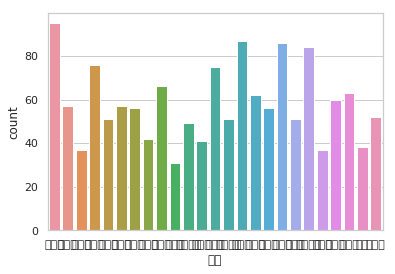

In [17]:
ld = dl.select('구명').toPandas()
sns.countplot(x='구명',data=ld)
plt.show()

+--------+----------+
|    구명|총거치대수|
+--------+----------+
|  서초구|      1214|
|영등포구|      1191|
|  강남구|      1150|
|  송파구|      1130|
|  마포구|      1025|
|  강서구|       884|
|  노원구|       840|
|  성동구|       771|
|  강동구|       763|
|  광진구|       720|
|  종로구|       706|
|  성북구|       687|
|  은평구|       671|
|  구로구|       661|
|서대문구|       643|
|동대문구|       633|
|  관악구|       632|
|  양천구|       628|
|  중랑구|       616|
|  용산구|       523|
+--------+----------+
only showing top 20 rows



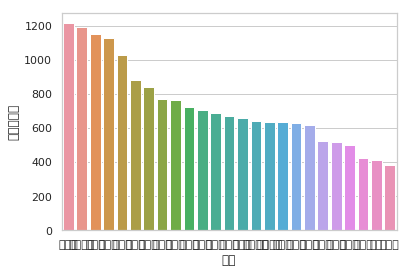

In [18]:
res =  dl.groupBy('구명').agg(sf.sum('거치대수').alias('총거치대수')).orderBy('총거치대수',ascending=False)
res.show()
res_df = res.toPandas()
sns.barplot(x='구명',y='총거치대수',data=res_df)
plt.show()

In [19]:
import pyspark.sql.functions as sf
from pyspark.sql.functions import col
du.where(du['기준일자'].between('2018-07-01','2018-07-31')).show()

du.filter(du['기준일자'].between('2018-07-01','2018-07-31')).show()

+----------+--------------------------------+-------------------+--------+--------+
|대여소위치|                        대여소명|           기준일자|대여건수|반납건수|
+----------+--------------------------------+-------------------+--------+--------+
|    양천구|   726. 목동3단지 시내버스정류장|2018-07-30 00:00:00|      24|      29|
|    양천구|        725. 양강중학교앞 교차로|2018-07-30 00:00:00|       9|       1|
|    양천구|724. 계남공원 입구 주출입구 좌측|2018-07-30 00:00:00|       8|      10|
|    양천구|                  723. SBS방송국|2018-07-30 00:00:00|      57|      51|
|    양천구|     722. LG전자베스트샵 신정점 |2018-07-30 00:00:00|      20|      26|
|    마포구|           426. 서울신용보증재단|2018-07-30 00:00:00|       9|      10|
|    마포구|            425. DMC첨단산업센터|2018-07-30 00:00:00|      23|      20|
|    마포구|  424. 롯데하이마트 (상암월드...|2018-07-30 00:00:00|      22|      10|
|    광진구|    502. 뚝섬유원지역 1번출구 앞|2018-07-30 00:00:00|     186|     246|
|    광진구|         3505. 신양초교앞 교차로|2018-07-30 00:00:00|      39|      22|
|    광진구|                  3504. 원일교회|2018-07

In [20]:
from pyspark.sql.functions import month
b2018 = du.filter(du['기준일자'].between('2018-01-01','2018-12-31'))
print(b2018.orderBy('대여건수',ascending=False).take(1))
print(b2018.orderBy('대여건수',ascending=True).take(1))


[Row(대여소위치='영등포구', 대여소명='207. 여의나루역 1번출구 앞', 기준일자=datetime.datetime(2018, 6, 1, 0, 0), 대여건수=8707, 반납건수=8153)]
[Row(대여소위치='구로구', 대여소명='1941. 오류동역 2번출구', 기준일자=datetime.datetime(2018, 11, 30, 0, 0), 대여건수=0, 반납건수=1)]


In [21]:
from pyspark.sql import Window
windowval = (Window.partitionBy(month(du['기준일자']).orderBy(month(du['기준일자']).rangeBetween(Window.unboundedPreceding,0))


SyntaxError: unexpected EOF while parsing (<ipython-input-21-2ac94b424b02>, line 2)

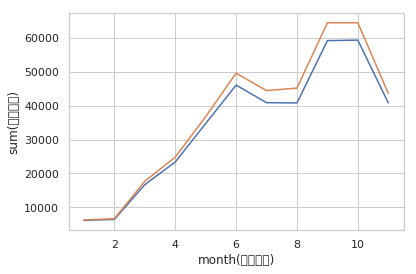

In [22]:
monthly_trend = b2018.where(du['대여소위치'] == '강남구') \
.groupBy(month(du['기준일자'])) \
.agg(sf.sum('대여건수'),sf.sum('반납건수')) \
.orderBy('month(기준일자)',ascending=True) \
.toPandas()

sns.lineplot(x='month(기준일자)',y='sum(반납건수)',data=monthly_trend)
sns.lineplot(x='month(기준일자)',y='sum(대여건수)',data=monthly_trend)

plt.show()

In [23]:
summary_2018 = b2018.groupBy('대여소명') \
    .agg(sf.sum('대여건수').alias('총대여수'),sf.sum('반납건수').alias('총반납수'))
    
summary_2018 =summary_2018.withColumn('diff',summary_2018['총대여수']-summary_2018['총반납수'])

In [24]:
summary_2018.show()

+-----------------------------+--------+--------+-----+
|                     대여소명|총대여수|총반납수| diff|
+-----------------------------+--------+--------+-----+
|      2156. 농협 관악문성지점|    4212|    4100|  112|
|2328. 르네상스 호텔 사거리...|    4610|    3663|  947|
|       2116. 에이스에이존빌딩|    4537|    4324|  213|
|        1816. 금천폭포공원 앞|    1246|     953|  293|
|     1438. 홈플러스 신내점 앞|    7513|    9583|-2070|
|      382. 약수역 10번출구 앞|    4300|    4308|   -8|
|                429. 송도병원|     128|      73|   55|
|        1275. 거여초등학교 옆|    2204|    2482| -278|
|                 2293. SPC 앞|    3666|    2922|  744|
|     1166. 강서구립등빛도서관|    8315|    8697| -382|
|          1959. 구로구의회 앞|    3778|    4211| -433|
|              300. 정동사거리|   10271|    8588| 1683|
|              1835. STX V타워|    3211|    3250|  -39|
|     174. 명지대학교 학생회관|    2302|    1759|  543|
|1224. 아시아지하보도 2번 출구|   11521|   11773| -252|
|1141. 곰달래 문화복지센터 1-1|    6833|    9743|-2910|
|1102. 방화사거리 마을버스 ...|    5438|    5734| -296|
|       28

In [25]:
usage100 = du.where(du['대여건수']>=100)\
        .select('대여건수','반납건수',sf.split('대여소명','[.]')[0].alias('대여소번호'))
joined = usage100.join(dl.select('대여소번호','구명','대여소명','위도'),on='대여소번호',how='inner')
joined.show()


+----------+--------+--------+------+------------------------------+---------+
|대여소번호|대여건수|반납건수|  구명|                      대여소명|     위도|
+----------+--------+--------+------+------------------------------+---------+
|      1210|     119|     132|송파구|롯데월드타워(잠실역2번출구 쪽)|37.513126|
|      1308|     116|     139|성북구|      안암로터리 버스정류장 앞|37.582592|
|       113|     144|     202|마포구|         홍대입구역 2번출구 앞|37.557499|
|       590|     104|     104|광진구|       건국대학교 (입학정보관)| 37.53989|
|      1308|     129|     140|성북구|      안암로터리 버스정류장 앞|37.582592|
|       113|     122|     194|마포구|         홍대입구역 2번출구 앞|37.557499|
|       590|     120|     121|광진구|       건국대학교 (입학정보관)| 37.53989|
|      1308|     116|     115|성북구|      안암로터리 버스정류장 앞|37.582592|
|       113|     130|     205|마포구|         홍대입구역 2번출구 앞|37.557499|
|       590|     131|     130|광진구|       건국대학교 (입학정보관)| 37.53989|
|      1210|     101|     102|송파구|롯데월드타워(잠실역2번출구 쪽)|37.513126|
|      1308|     104|     131|성북구|      안암로터리 버스정류장 앞|37.582592|

In [29]:
from pyspark.sql.functions import col
joined.orderBy('위도',ascending=True).show()
joined.sort(col('위도').asc())

+----------+--------+--------+------+------------------------------------+---------+
|대여소번호|대여건수|반납건수|  구명|                            대여소명|     위도|
+----------+--------+--------+------+------------------------------------+---------+
|      1820|     154|     253|금천구|       신한은행 시흥대로금융센터지점| 37.44334|
|      1816|     181|     150|금천구|                     금천폭포공원 앞|37.446861|
|      2203|     190|     135|서초구|                청계산입구역 2번출구|37.447659|
|      2202|    1054|    1082|서초구|                청계산입구역 1번출구|37.448936|
|      2270|     238|     252|서초구|                  서초포레스타 7단지|37.448967|
|      1821|     243|     314|금천구|홈플러스 시흥점 맞은편 다비치안경 앞|37.451458|
|      1822|     405|     456|금천구|                서울 시흥동우체국 앞|37.452991|
|      2201|     155|     174|서초구|                    본마을 정류소 앞|37.453281|
|      2205|     587|     548|서초구|             내곡3단지 어린이공원 앞|37.453751|
|      2206|     913|     914|서초구|                     언남초등학교 앞|37.454399|
|      2207|     138|      96|서초구|        

In [27]:
joined.show()

+----------+--------+--------+------+------------------------------+---------+
|대여소번호|대여건수|반납건수|  구명|                      대여소명|     위도|
+----------+--------+--------+------+------------------------------+---------+
|      1210|     119|     132|송파구|롯데월드타워(잠실역2번출구 쪽)|37.513126|
|      1308|     116|     139|성북구|      안암로터리 버스정류장 앞|37.582592|
|       113|     144|     202|마포구|         홍대입구역 2번출구 앞|37.557499|
|       590|     104|     104|광진구|       건국대학교 (입학정보관)| 37.53989|
|      1308|     129|     140|성북구|      안암로터리 버스정류장 앞|37.582592|
|       113|     122|     194|마포구|         홍대입구역 2번출구 앞|37.557499|
|       590|     120|     121|광진구|       건국대학교 (입학정보관)| 37.53989|
|      1308|     116|     115|성북구|      안암로터리 버스정류장 앞|37.582592|
|       113|     130|     205|마포구|         홍대입구역 2번출구 앞|37.557499|
|       590|     131|     130|광진구|       건국대학교 (입학정보관)| 37.53989|
|      1210|     101|     102|송파구|롯데월드타워(잠실역2번출구 쪽)|37.513126|
|      1308|     104|     131|성북구|      안암로터리 버스정류장 앞|37.582592|

In [36]:
j = dl.join(du.withColumn('대여소번호',sf.split('대여소명','[.]')[0]),on='대여소번호',how='inner')

In [50]:
tmp = j.groupBy('대여소번호').agg(sf.avg('대여건수').alias('평균대여'),sf.avg('거치대수').alias('대여소')) 
tmp.withColumn('비율',tmp['평균대여']/tmp['대여소']).show()

j.groupBy('대여소번호').agg(sf.avg('대여건수').alias('평균대여'),sf.avg('거치대수').alias('대여소'))\
                        .withColumn('비율',col('평균대여')/col('대여소')).show()

+----------+------------------+------+------------------+
|대여소번호|          평균대여|대여소|              비율|
+----------+------------------+------+------------------+
|      2122| 25.70124481327801|  20.0|1.2850622406639005|
|      1829| 12.35234215885947|  10.0| 1.235234215885947|
|       148|24.560047562425684|  11.0| 2.232731596584153|
|      1959|19.575129533678755|  10.0|1.9575129533678755|
|      1342| 8.581469648562301|  15.0|0.5720979765708201|
|      1522| 9.098557692307692|  10.0|0.9098557692307692|
|      2235|11.006036217303823|  15.0|0.7337357478202549|
|      1127|17.075875486381324|  10.0|1.7075875486381324|
|       623| 47.54433497536946|  20.0|2.3772167487684728|
|       243|  21.6256038647343|  15.0|  1.44170692431562|
|       540| 55.12154031287605|   8.0| 6.890192539109506|
|      2387| 22.41826923076923|  10.0| 2.241826923076923|
|      1721|29.620689655172413|  12.0| 2.468390804597701|
|      1025| 7.384341637010676|  10.0|0.7384341637010676|
|       737| 13.396226415094

In [ ]:
df= spark.read.json('s3://ssds2/people.json')

In [ ]:
df.show()

In [ ]:
df.printSchema()

In [ ]:
df.select('name').show()

In [ ]:
type(df['name'])

In [ ]:
df.select(df['name'],df['age']+1).show()

In [ ]:
df.filter(df['age']>21).show()

In [ ]:
df.where('age>21').show()

In [ ]:
df.groupBy('age').count().show()

In [ ]:
df.orderBy('age',ascending=False).show()

In [ ]:
df.describe().show()

In [ ]:
df.show()

In [ ]:
df.describe(['age']).show()

In [ ]:
df.createOrReplaceTempView('people')

In [ ]:
sqldf =spark.sql('select * from people')

In [ ]:
sqldf.show()

In [ ]:
sqldf.show()

In [ ]:
df_loc = spark.read.option('header','true') \
        .option('nullValue','?') \
        .option('inferSchema','true') \
        .csv('s3://ssds2/bikeshare_loc.csv')
df_usage = spark.read.option('header','true') \
        .option('nullValue','?') \
        .option('inferSchema','true') \
        .csv('s3://ssds2/bikeshare_seoul.csv')

In [ ]:
df_loc.show()

In [ ]:
df_loc.filter(df_loc['대여소번호']==2319).show()

In [ ]:
df_loc.show()

In [ ]:
dl = df_loc
du = df_usage

## 지역별(구단위) 따릉이 대여소의 총수/가장 많은 곳/가장 적은곳

In [ ]:
maxg = dl.groupBy('구명').count().orderBy('count',ascending=False).take(1)
ming = dl.groupBy('구명').count().orderBy('count',ascending=True).take(1)
print('가장많은곳 : ', maxg)
print('가장적은곳 : ', ming)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mlt

In [ ]:
l_pd = dl.select('구명').toPandas()
sns.countplot(x='구명',data=l_pd)
plt.show()

In [ ]:
dl.show()

In [ ]:
mingu = dl.groupBy('구명').sum('거치대수').orderBy('sum(거치대수)',ascending=True).take(1)
maxgu = dl.groupBy('구명').sum('거치대수').orderBy('sum(거치대수)',ascending=False).take(1)
print('최소:',mingu)
print('최대',maxgu)

In [ ]:
gugu = dl.groupBy('구명').sum('거치대수').toPandas()

In [ ]:
sns.barplot(x='구명',y= 'sum(거치대수)',data=gugu)
gugu

In [ ]:
import pyspark.sql.functions as sf
from pyspark.sql.functions import col

In [ ]:
#du.where(df['기준일자'].between('2018-07-01','2018-07-31'))

du.show()

In [ ]:
type(du['기준일자'].between('2018-07-01','2018-07-31'))
du.where(du['기준일자'].between('2018-07-01','2018-07-31')).show()

In [ ]:
u2318_may=du.where(du['기준일자'].between('2018-05-01','2018-05-31'))\
            .select('기준일자','대여건수','반납건수',sf.split('대여소명','[.]')[0].alias('대여소번호'))\
            .filter(col('대여소번호')==2318)

In [ ]:
sns.lineplot(x='기준일자',y='대여건수',data=u2318_may.toPandas())
plt.show()

In [ ]:
du.show()

In [ ]:
type(du['기준일자'])

In [ ]:
u2018 = du.where(du['기준일자'].between('2018-01-01','2018-12-31'))

In [ ]:
monthly = u2018.groupBy('기준일자')
daily_max = u2018.orderBy('대여건수',ascending=False).take(1)
daily_min = u2018.orderBy('대여건수',ascending=True).take(1)
print('최소 :',daily_min)
print('최대 :',daily_max)

In [ ]:
gangnam = u2018.where(u2018['대여소위치']=='강남구')

In [ ]:
from pyspark.sql.functions import hour,mean,month,year,dayofmonth


In [ ]:
#gangnam.groupBy(month('기준일자').alias('monthly')).agg(sum('반납건수').alias('sum반납')).show()
gangnam.withColumn(col(month('기준일자')))

In [ ]:
u2018.withColumn('월',month(du['기준일자']))

In [ ]:
du.show()